In [114]:
"""
    MNIST
    DataLoaer, Transformation
    Multilayer Neural Net, activation function
    loss and optimizer
    training loop(batch training)
    model evaluation
    GPU SUPPORT
"""

'\n    MNIST\n    DataLoaer, Transformation\n    Multilayer Neural Net, activation function\n    loss and optimizer\n    training loop(batch training)\n    model evaluation\n    GPU SUPPORT\n'

In [115]:
import torch
import torch.nn as nn
import torchvision
import matplotlib.pyplot as plt
import torchvision.transforms as transforms


In [116]:
############## TENSORBOARD ########################
import sys
import torch.nn.functional as F
from torch.utils.tensorboard import SummaryWriter
# default `log_dir` is "runs" - we'll be more specific here
writer = SummaryWriter('runs/mnist1')
###################################################

In [117]:
import pandas as pd

In [118]:
if torch.cuda.is_available():
    print("hello")
else:
    print("world")

world


In [119]:
# device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [120]:
# hyper parameters
input_size = 784#28*28
hidden_size =100
num_classes =10# number is from 0 to 9
num_epochs = 20
batch_size=100
learning_rate = 0.001

In [121]:
# mnist
train_dataset = torchvision.datasets.MNIST(root = './',train=True,transform=transforms.ToTensor(),download=True)
test_dataset = torchvision.datasets.MNIST(root = './',train=False,transform=transforms.ToTensor())

In [122]:
print(train_dataset)

Dataset MNIST
    Number of datapoints: 60000
    Root location: ./
    Split: Train
    StandardTransform
Transform: ToTensor()


In [123]:
train_loader = torch.utils.data.DataLoader(
    dataset=train_dataset, batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(
    dataset=test_dataset, batch_size=batch_size, shuffle=False)


In [124]:
examples = iter(train_loader)
samples,labels = examples.next()
print(samples.shape,labels.shape)
# batch size is 100, 1- because we have single colour channel

torch.Size([100, 1, 28, 28]) torch.Size([100])


In [125]:
examples = iter(test_loader)
example_data, example_targets = examples.next()

In [126]:
############## TENSORBOARD ########################
img_grid = torchvision.utils.make_grid(example_data)
writer.add_image('mnist_images', img_grid)
#writer.close()
#sys.exit()
###################################################

In [127]:
print(samples)
print(labels)

tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        ...,


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0.

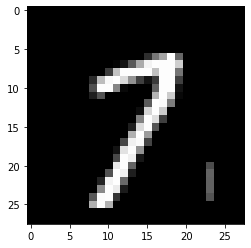

In [128]:
plt.imshow(samples[9][0],cmap = "gray")
plt.show()

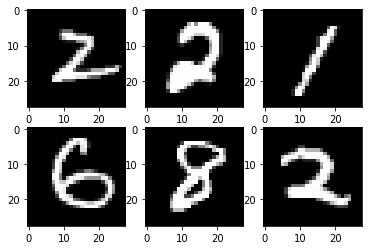

In [129]:
for i in range(6):
    plt.subplot(2,3,i+1)
    plt.imshow(samples[i][0],cmap='gray')
plt.show()

In [130]:
# now we need to make our classifier model
class NeuralNet(nn.Module):
    def __init__(self,input_size,hidden_size,num_classes):
        super(NeuralNet, self).__init__()
        self.l1 = nn.Linear(input_size,hidden_size)
        self.tanh = nn.Tanh()
        self.l2 = nn.Linear(hidden_size,hidden_size//2)
        self.l3=nn.Linear(hidden_size//2,num_classes)

    def forward(self,x):
        out=self.l1(x)
        out=self.tanh(out)
        out=self.l2(out)
        out=self.tanh(out)
        out=self.l3(out)
        return out

In [131]:
model = NeuralNet(input_size,hidden_size,num_classes)

In [132]:
# loss and optimizer
criterion = nn.CrossEntropyLoss() # this will create the softmax for us 
optimizer = torch.optim.Adam(model.parameters(),lr=learning_rate)

In [133]:
writer.add_graph(model,example_data.reshape(-1,28*28))

In [134]:
# Train the model
running_loss = 0.0
running_correct = 0
n_total_steps = len(train_loader)

In [135]:
# training loop 
n_total_steps = len(train_loader)
for epoch in range(num_epochs):
    for i,(images,labels) in enumerate(train_loader):
        # we need to reshape our images
        # 100,1,28,28 to  100,784
        images = images.reshape(-1,28*28).to(device)
        labels = labels.to(device)

        # forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)

        #backward pass
        optimizer.zero_grad()
        loss.backward
        optimizer.step()

        running_loss += loss.item()

        _, predicted = torch.max(outputs.data, 1)
        running_correct += (predicted == labels).sum().item()

        if (i+1) %100==0:
            print(f'epoch {epoch+1} / {num_epochs}, step {i+1}/{n_total_steps}, loss = {loss.item():.4f}')
            ############## TENSORBOARD ########################
            writer.add_scalar('training loss', running_loss / 100, epoch * n_total_steps + i)
            running_accuracy = running_correct / 100 / predicted.size(0)
            writer.add_scalar('accuracy', running_accuracy, epoch * n_total_steps + i)
            running_correct = 0
            running_loss = 0.0
            ###################################################

epoch 1 / 20, step 100/600, loss = 2.2988
epoch 1 / 20, step 200/600, loss = 2.2776
epoch 1 / 20, step 300/600, loss = 2.3098
epoch 1 / 20, step 400/600, loss = 2.3101
epoch 1 / 20, step 500/600, loss = 2.3259
epoch 1 / 20, step 600/600, loss = 2.3117
epoch 2 / 20, step 100/600, loss = 2.2907
epoch 2 / 20, step 200/600, loss = 2.3167
epoch 2 / 20, step 300/600, loss = 2.2815
epoch 2 / 20, step 400/600, loss = 2.3225
epoch 2 / 20, step 500/600, loss = 2.3069
epoch 2 / 20, step 600/600, loss = 2.2918
epoch 3 / 20, step 100/600, loss = 2.3035
epoch 3 / 20, step 200/600, loss = 2.2783
epoch 3 / 20, step 300/600, loss = 2.3075
epoch 3 / 20, step 400/600, loss = 2.3142
epoch 3 / 20, step 500/600, loss = 2.2947
epoch 3 / 20, step 600/600, loss = 2.2996
epoch 4 / 20, step 100/600, loss = 2.3007
epoch 4 / 20, step 200/600, loss = 2.3022
epoch 4 / 20, step 300/600, loss = 2.3040
epoch 4 / 20, step 400/600, loss = 2.3178
epoch 4 / 20, step 500/600, loss = 2.3248
epoch 4 / 20, step 600/600, loss =

KeyboardInterrupt: 

In [ ]:
# test
"""with torch.no_grad():
    n_correct = 0
    n_samples = 0
    for images, labels in test_loader:
        images = images.reshape(-1, 28*28).to(device)
        labels = labels.to(device)
        outputs = model(images)

        # value, index
        _, predictions = torch.max(outputs, 1)
        n_samples += labels.shape[0]
        n_correct += (predictions == labels).sum().item()

    acc = 100 * n_correct/n_samples  # calculate accuracy
    print(f'accuracy: {acc}')
"""

"with torch.no_grad():\n    n_correct = 0\n    n_samples = 0\n    for images, labels in test_loader:\n        images = images.reshape(-1, 28*28).to(device)\n        labels = labels.to(device)\n        outputs = model(images)\n\n        # value, index\n        _, predictions = torch.max(outputs, 1)\n        n_samples += labels.shape[0]\n        n_correct += (predictions == labels).sum().item()\n\n    acc = 100 * n_correct/n_samples  # calculate accuracy\n    print(f'accuracy: {acc}')\n"

In [ ]:
# Test the model
# In test phase, we don't need to compute gradients (for memory efficiency)
class_labels = []
class_preds = []
with torch.no_grad():
    n_correct = 0
    n_samples = 0
    for images, labels in test_loader:
        images = images.reshape(-1, 28*28).to(device)
        labels = labels.to(device)
        outputs = model(images)
        # max returns (value ,index)
        values, predicted = torch.max(outputs.data, 1)
        n_samples += labels.size(0)
        n_correct += (predicted == labels).sum().item()

        class_probs_batch = [F.softmax(output, dim=0) for output in outputs]

        class_preds.append(class_probs_batch)
        class_labels.append(predicted)

    # 10000, 10, and 10000, 1
    # stack concatenates tensors along a new dimension
    # cat concatenates tensors in the given dimension
    class_preds = torch.cat([torch.stack(batch) for batch in class_preds])
    class_labels = torch.cat(class_labels)

    acc = 100.0 * n_correct / n_samples
    print(f'Accuracy of the network on the 10000 test images: {acc} %')

    ############## TENSORBOARD ########################
    classes = range(10)
    for i in classes:
        labels_i = class_labels == i
        preds_i = class_preds[:, i]
        writer.add_pr_curve(str(i), labels_i, preds_i, global_step=0)
        writer.close()
    ###################################################
    print(f'count of correct answer was {n_correct} among 10000 images')

Accuracy of the network on the 10000 test images: 12.37 %
count of correct answer was 1237 among 10000 images
